In [38]:
import pandas as pd

In [39]:
bird_tracking = pd.read_csv('bird_tracking.csv')

In [40]:
bird_tracking.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [41]:
import matplotlib.pyplot as plt

In [42]:
import numpy as np

In [43]:
ix = bird_tracking.bird_name == "Eric"

In [44]:
x, y = bird_tracking.longitude[ix], bird_tracking.latitude[ix]

In [45]:
plt.figure(figsize=(7, 7))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

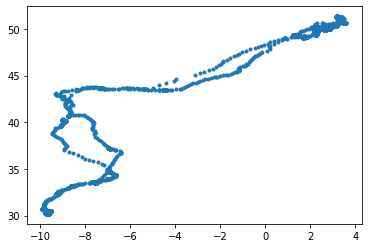

In [46]:
plt.plot(x, y, ".")

In [47]:
bird_names = pd.unique(bird_tracking.bird_name)

In [48]:
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

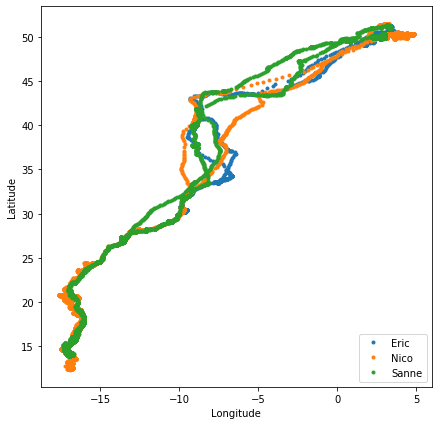

In [49]:
plt.figure(figsize=(7, 7))

for bird_name in bird_names:
    ix = bird_tracking.bird_name == bird_name
    x, y = bird_tracking.longitude[ix], bird_tracking.latitude[ix]
    plt.plot(x, y, '.', label=bird_name)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='lower right')


C:\Users\StdUser\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\StdUser\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <a list of 10 Patch objects>)

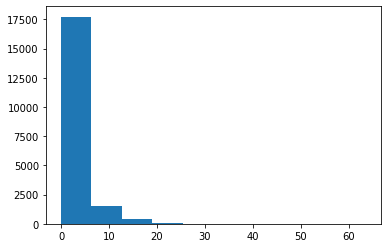

In [50]:
ix = bird_tracking.bird_name == "Eric"
speed = bird_tracking.speed_2d[ix]
plt.hist(speed)

(array([3., 1., 0., 0., 1., 2., 2., 0., 0., 1.]),
 array([0.15      , 0.59422108, 1.03844216, 1.48266324, 1.92688432,
        2.3711054 , 2.81532648, 3.25954756, 3.70376864, 4.14798972,
        4.5922108 ]),
 <a list of 10 Patch objects>)

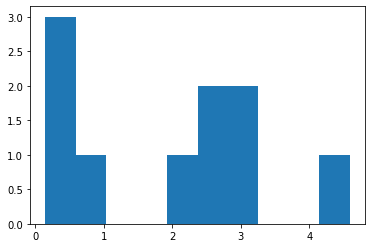

In [51]:
plt.hist(speed[:10])

In [52]:
np.isnan(speed)

0        False
1        False
2        False
3        False
4        False
         ...  
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [53]:
np.isnan(speed).any()

True

In [54]:
np.sum(np.isnan(speed))

85

In [55]:
ind = np.isnan(speed)

C:\Users\StdUser\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Frequency')

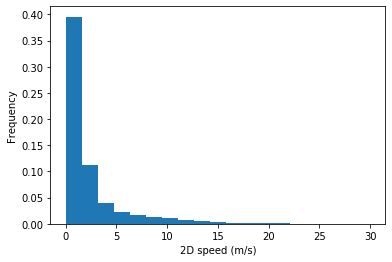

In [56]:
plt.hist(speed[~ind], bins=np.linspace(0, 30, 20), normed=True)
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency")

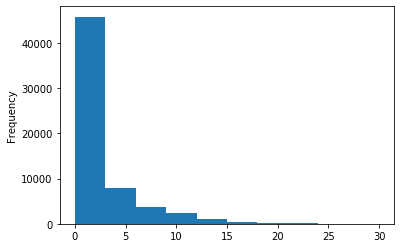

In [57]:
bird_tracking.speed_2d.plot(kind='hist', range=[0, 30])

In [58]:
import datetime

In [59]:
datetime.datetime.today()

datetime.datetime(2020, 3, 18, 2, 7, 0, 820976)

In [60]:
time_1 = datetime.datetime.today()

In [61]:
time_2 = datetime.datetime.today()

time_2 - time_1

datetime.timedelta(0, 0, 177365)

In [62]:
date_str = bird_tracking.date_time[0]

type(date_str)

str

In [63]:
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [64]:
timestamps = []
for k in range(len(bird_tracking)):
    timestamps.append(datetime.datetime.strptime(bird_tracking.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

In [65]:
bird_tracking['timestamps'] = pd.Series(timestamps, index=bird_tracking.index)

In [66]:
bird_tracking.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamps
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [67]:
times = bird_tracking.timestamps[bird_tracking.bird_name == "Eric"]

elapsed_time = [time - times[0] for time in times]

In [68]:
elapsed_time[0]

Timedelta('0 days 00:00:00')

Text(0, 0.5, 'Elapsed time (days)')

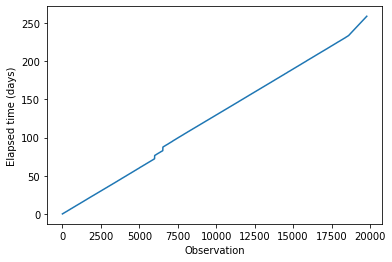

In [69]:
plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)")

In [70]:
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)

next_day = 1
inds = []
daily_mean_speed = []

for (i, t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(bird_tracking.speed_2d[inds]))
        next_day += 1
        inds = []

Text(0, 0.5, 'Mean speed (m/s)')

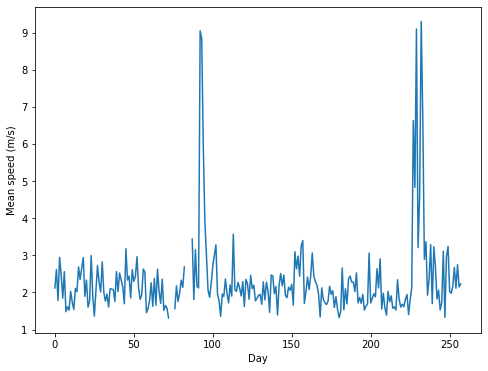

In [71]:
plt.figure(figsize=(8, 6))

plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)")

In [72]:
bird_tracking[bird_tracking.bird_name=="Sanne"]["timestamps"]

40916   2013-08-15 00:01:08
40917   2013-08-15 00:31:00
40918   2013-08-15 01:01:19
40919   2013-08-15 01:31:38
40920   2013-08-15 02:01:24
                ...        
61915   2014-04-30 22:00:08
61916   2014-04-30 22:29:57
61917   2014-04-30 22:59:52
61918   2014-04-30 23:29:43
61919   2014-04-30 23:59:34
Name: timestamps, Length: 21004, dtype: datetime64[ns]

In [73]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

C:\Users\StdUser\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\StdUser\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\StdUser\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\StdUser\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


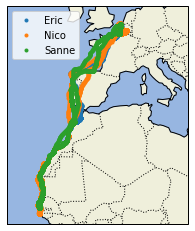

In [76]:
proj = ccrs.Mercator()
ax = plt.axes(projection = proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

for name in bird_names:
    ix = bird_tracking.bird_name == name
    x, y = bird_tracking.longitude[ix], bird_tracking.latitude[ix]
    ax.plot(x, y, '.', transform=ccrs.Geodetic(), label=name)
    
plt.legend(loc='upper left')